In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
X=df.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2


In [5]:
y=df.iloc[:,-1:]
y.head()

,target
0,0
1,1
2,0
3,0
4,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#30

In [8]:
X_test

array([[ 0.37837565, -1.44631834,  0.86790253, ...,  0.66354767,
        -0.72970605, -0.54188016],
       [-1.0658314 ,  0.69141072,  0.86790253, ...,  0.66354767,
         2.47465531,  1.16842909],
       [ 0.0450971 , -1.44631834,  0.86790253, ...,  0.66354767,
         0.3384144 ,  1.16842909],
       ...,
       [-0.06599575,  0.69141072,  0.86790253, ...,  0.66354767,
         0.3384144 ,  1.16842909],
       [-0.3992743 , -1.44631834,  0.86790253, ...,  0.66354767,
        -0.72970605,  1.16842909],
       [ 0.9338399 ,  0.69141072,  0.86790253, ..., -0.95786317,
         1.40653485,  1.16842909]])

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\JYOTIKA\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [10]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

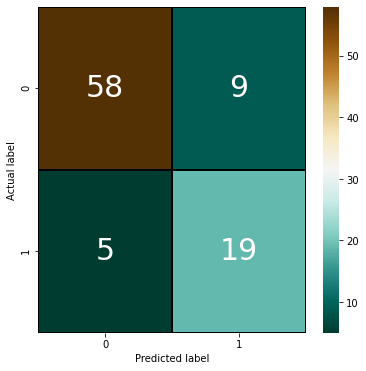

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Naive Bayes:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Naive Bayes:',(TP/(TP+FN)))
print('Testing Specificity for Naive Bayes:',(TN/(TN+FP)))
print('Testing Precision for Naive Bayes:',(TP/(TP+FP)))

Testing Accuracy for Naive Bayes: 0.8461538461538461
Testing Sensitivity for Naive Bayes: 0.9206349206349206
Testing Specificity for Naive Bayes: 0.6785714285714286
Testing Precision for Naive Bayes: 0.8656716417910447
